# Install and import necessary packages

In [1]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 776.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=be3abead8041a9cf422ab8f8edd80497f9d8dd84f131c167bf8b3821b0e24a63
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [4]:
import pandas
import re
import scanpy
import matplotlib.pyplot
import seaborn
import urllib

# Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory

In [5]:
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')
adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


# Load genes

In [6]:
# List of genes of interest
genes_of_interest = [
    "SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP",
    "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609",
    "PHYHIP", "RP11-745L13.2"
]

In [7]:
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

    gene_mapping = dict(zip(gene_ids, gene_names))

    matched_genes = {}
    unmatched_genes = []

    for gene in genes_of_interest:
        matched_ids = [ensembl_id for ensembl_id, gene_name in gene_mapping.items() if gene_name == gene]
        if matched_ids:
            matched_genes[matched_ids[0]] = gene
        else:
            unmatched_genes.append(gene)

    print("\nMatched Genes (gene name: ID name):")
    for ensembl_id, gene_name in matched_genes.items():
        print(f"{gene_name}: {ensembl_id}")

    if unmatched_genes:
        print("\nUnmatched Genes:")
        for gene in unmatched_genes:
            print(f"{gene} - No matches found")

    adata_genes_filtered = adata[:, list(matched_genes.keys())].copy()

    print("\nFiltered AnnData object:")
    print(adata_genes_filtered)
else:
    print("The 'feature_name' column is missing in adata.var; cannot map gene names to Ensembl IDs.")


Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783
PDE4DIP: ENSG00000178104
LINC01609: ENSG00000253103
PHYHIP: ENSG00000168490

Unmatched Genes:
RP11-701H24.9 - No matches found
AC159540.1 - No matches found
RP11-289H16.1 - No matches found
RP11-219A15.1 - No matches found
RP11-745L13.2 - No matches found

Filtered AnnData object:
AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tiss

# Experiment and find the differences between the two cohorts in disease category

In [15]:
adata_ad = adata[adata.obs['disease'] == 'Alzheimer disease'].copy()
adata_normal = adata[adata.obs['disease'] == 'normal'].copy()

In [16]:
adata_filtered = adata[adata.obs['disease'].isin(['Alzheimer disease', 'normal'])].copy()
adata_filtered.obs['disease_status'] = adata_filtered.obs['disease']

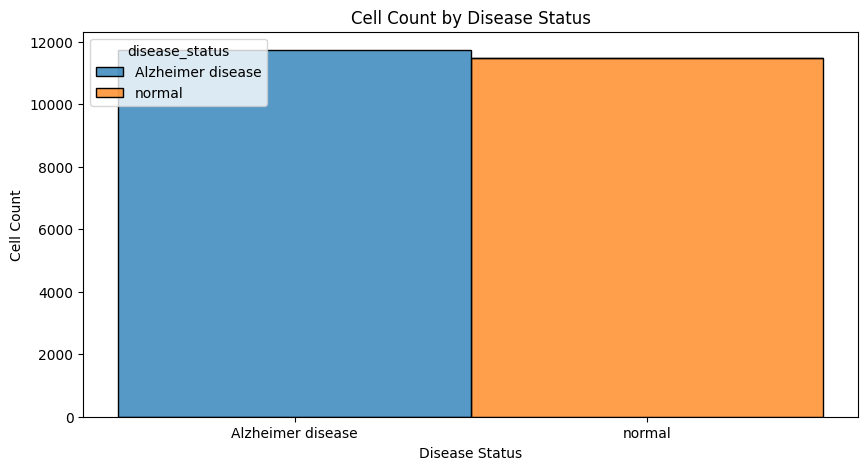

In [17]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.histplot(data=adata_filtered.obs, x='disease_status', hue='disease_status', multiple='stack', kde=False)
matplotlib.pyplot.title("Cell Count by Disease Status")
matplotlib.pyplot.xlabel("Disease Status")
matplotlib.pyplot.ylabel("Cell Count")
matplotlib.pyplot.show()

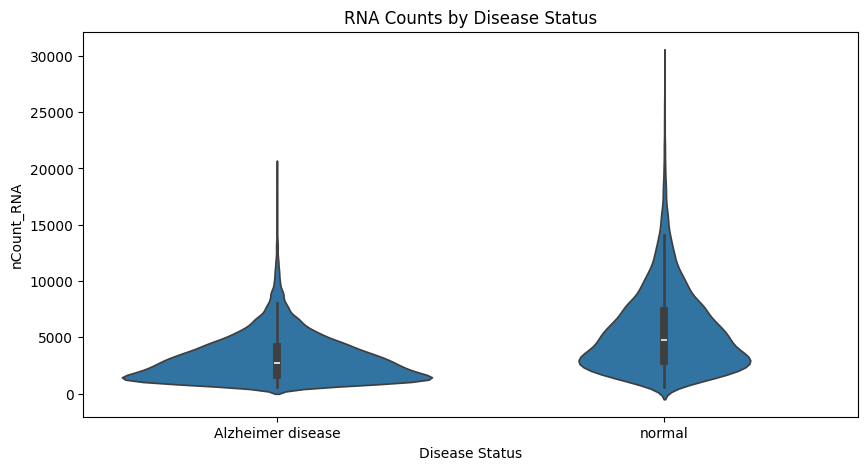

In [18]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='disease_status', y='nCount_RNA', data=adata_filtered.obs)
matplotlib.pyplot.title("RNA Counts by Disease Status")
matplotlib.pyplot.ylabel("nCount_RNA")
matplotlib.pyplot.xlabel("Disease Status")
matplotlib.pyplot.show()

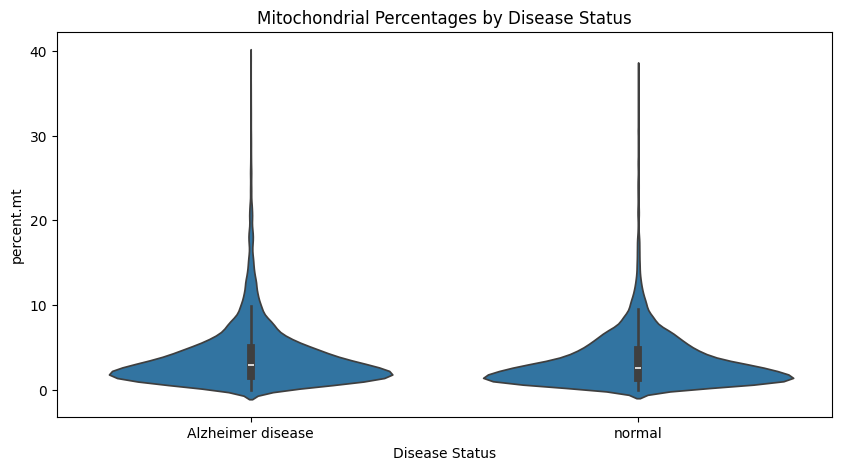

In [19]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='disease_status', y='percent.mt', data=adata_filtered.obs)
matplotlib.pyplot.title("Mitochondrial Percentages by Disease Status")
matplotlib.pyplot.ylabel("percent.mt")
matplotlib.pyplot.xlabel("Disease Status")
matplotlib.pyplot.show()

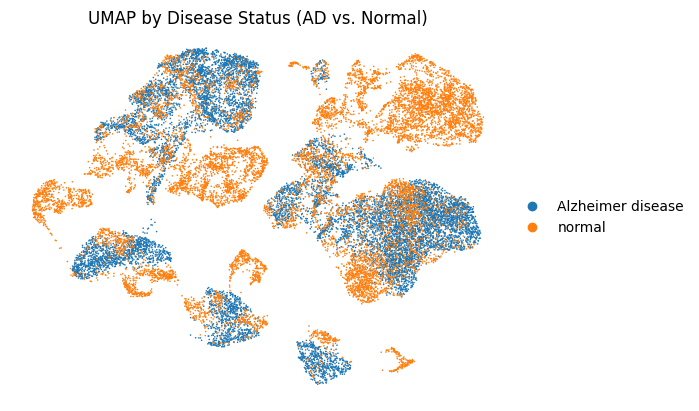

In [20]:
scanpy.tl.pca(adata_filtered, svd_solver='arpack')
scanpy.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
scanpy.tl.umap(adata_filtered)
scanpy.pl.umap(adata_filtered, color='disease_status', title="UMAP by Disease Status (AD vs. Normal)", frameon=False)

In this comparison of Alzheimer’s disease (AD) versus normal subjects, distinct differences in cellular characteristics were observed. The cell count distribution shows comparable representation between AD and normal cohorts, allowing for balanced analysis. Violin plots reveal that AD subjects tend to have lower RNA counts (`nCount_RNA`) relative to normal subjects, which could indicate reduced transcriptional activity or compromised RNA quality associated with neurodegenerative processes. Mitochondrial percentages (`percent.mt`) appear slightly elevated in AD cells, possibly reflecting increased metabolic demands or mitochondrial dysfunction often linked to Alzheimer’s pathology. The UMAP visualization demonstrates overlapping clusters for AD and normal cells, suggesting shared cellular types and structures across disease states, although subtle separation hints at disease-associated transcriptional changes. These findings highlight key cellular and molecular variations between AD and normal subjects, providing insights into Alzheimer’s impact on cellular composition and activity.

# Experiment with subjects of different ages (57 - 89) in development_stage category.

In [ ]:
def extract_age(stage):
    match = re.search(r'\d+', stage)
    return int(match.group()) if match else None

adata.obs['age'] = adata.obs['development_stage'].apply(extract_age).astype(float)
adata_filtered = adata[(adata.obs['age'] >= 57) & (adata.obs['age'] <= 89)].copy()


In [ ]:
adata_filtered.obs['age_group'] = adata_filtered.obs['age'].apply(lambda x: 'younger' if x <= 70 else 'older')

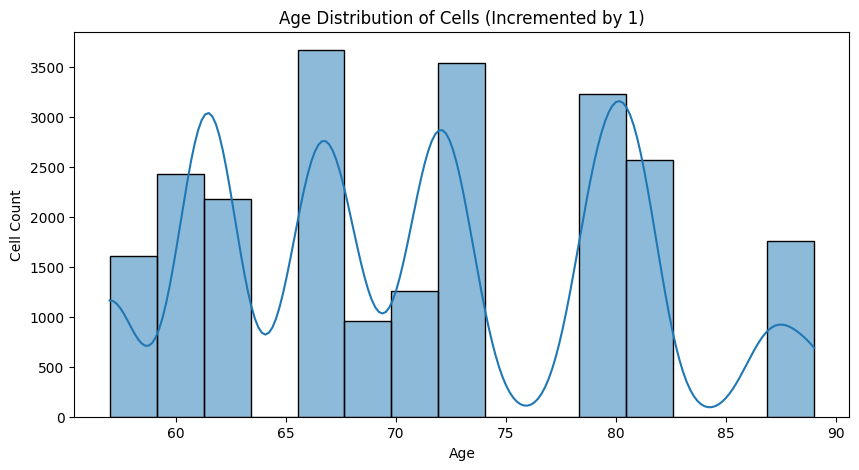

In [ ]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.histplot(adata_filtered.obs['age'], bins=15, kde=True)
matplotlib.pyplot.title("Age Distribution of Cells (Incremented by 1)")
matplotlib.pyplot.xlabel("Age")
matplotlib.pyplot.ylabel("Cell Count")
matplotlib.pyplot.show()

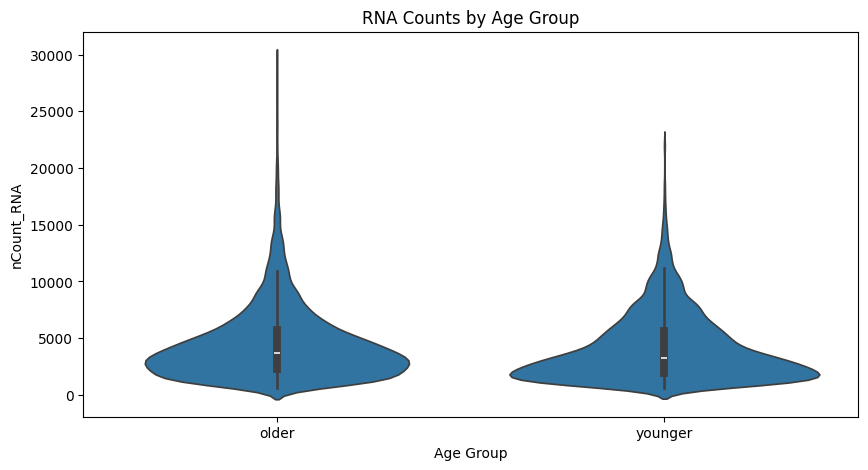

In [ ]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='age_group', y='nCount_RNA', data=adata_filtered.obs)
matplotlib.pyplot.title("RNA Counts by Age Group")
matplotlib.pyplot.ylabel("nCount_RNA")
matplotlib.pyplot.xlabel("Age Group")
matplotlib.pyplot.show()

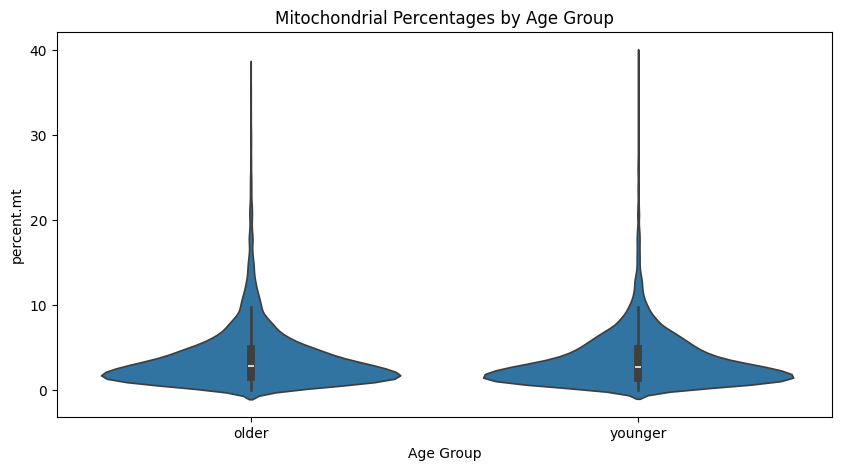

In [ ]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='age_group', y='percent.mt', data=adata_filtered.obs)
matplotlib.pyplot.title("Mitochondrial Percentages by Age Group")
matplotlib.pyplot.ylabel("percent.mt")
matplotlib.pyplot.xlabel("Age Group")
matplotlib.pyplot.show()


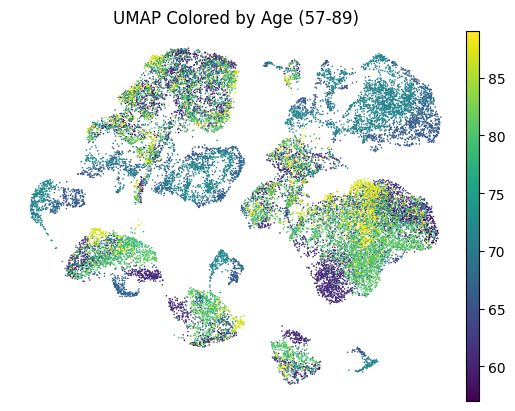

In [ ]:
scanpy.tl.pca(adata_filtered, svd_solver='arpack')
scanpy.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
scanpy.tl.umap(adata_filtered)
scanpy.pl.umap(adata_filtered, color='age', title="UMAP Colored by Age (57-89)", frameon=False)

In this age-based analysis, subjects were grouped into "younger" (ages 57-70) and "older" (ages 71-89) cohorts, with age adjusted by one year for finer detail. The age distribution histogram shows peaks at certain ages, indicating uneven representation, which may reflect sampling variations. Violin plots reveal that older subjects tend to have a wider range of RNA counts (`nCount_RNA`), with a shift toward lower values, suggesting possible age-related declines in transcriptional activity or RNA quality. Mitochondrial gene expression (`percent.mt`) remains generally consistent across age groups, although variability increases slightly in older subjects, possibly signaling elevated cellular stress or metabolic shifts. UMAP visualization colored by age shows partial mixing across clusters but also reveals subtle age-related patterns, indicating that aging contributes to molecular diversity within neuronal populations. These findings highlight age-related changes in cellular and molecular characteristics, emphasizing the importance of age as a factor in neurodegenerative disease studies.

# Experiment with gender cohorts (sex = male vs. female)

In [8]:
adata_male = adata[adata.obs['sex'] == 'male'].copy()
adata_female = adata[adata.obs['sex'] == 'female'].copy()

In [9]:
adata_filtered = adata[adata.obs['sex'].isin(['male', 'female'])].copy()
adata_filtered.obs['gender'] = adata_filtered.obs['sex']

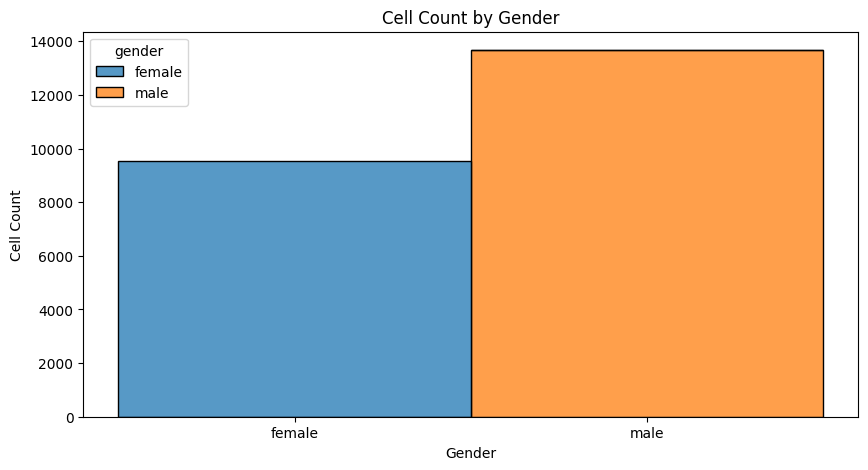

In [10]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.histplot(data=adata_filtered.obs, x='gender', hue='gender', multiple='stack', kde=False)
matplotlib.pyplot.title("Cell Count by Gender")
matplotlib.pyplot.xlabel("Gender")
matplotlib.pyplot.ylabel("Cell Count")
matplotlib.pyplot.show()

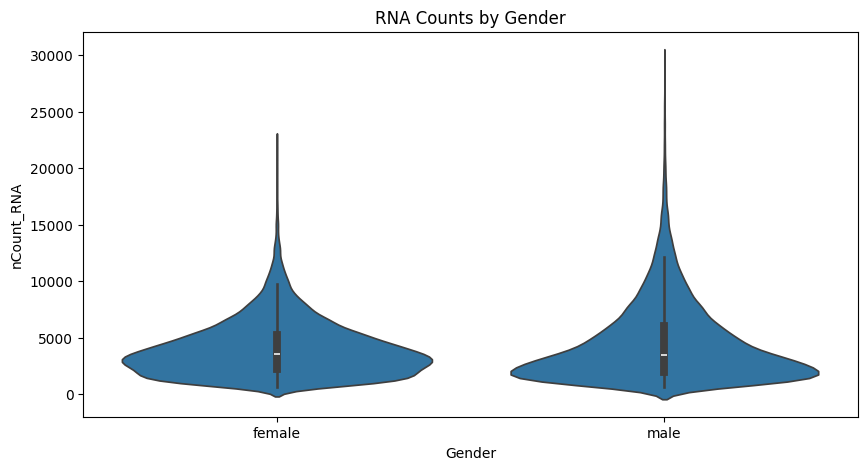

In [11]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='gender', y='nCount_RNA', data=adata_filtered.obs)
matplotlib.pyplot.title("RNA Counts by Gender")
matplotlib.pyplot.ylabel("nCount_RNA")
matplotlib.pyplot.xlabel("Gender")
matplotlib.pyplot.show()

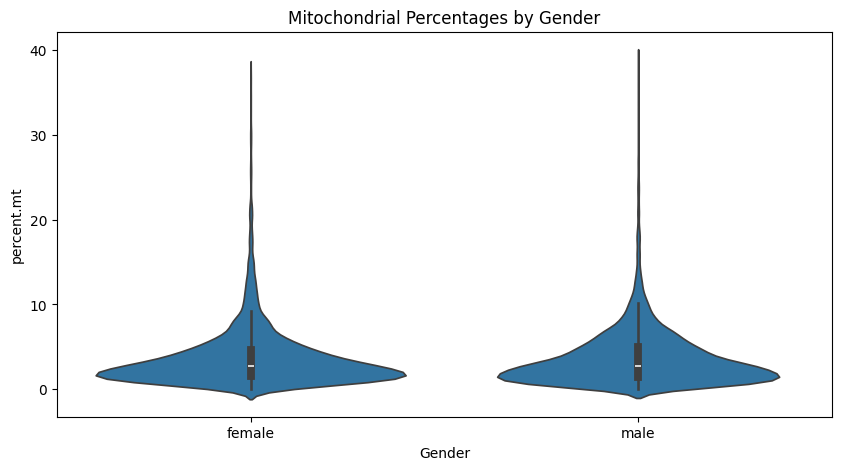

In [12]:
matplotlib.pyplot.figure(figsize=(10, 5))
seaborn.violinplot(x='gender', y='percent.mt', data=adata_filtered.obs)
matplotlib.pyplot.title("Mitochondrial Percentages by Gender")
matplotlib.pyplot.ylabel("percent.mt")
matplotlib.pyplot.xlabel("Gender")
matplotlib.pyplot.show()

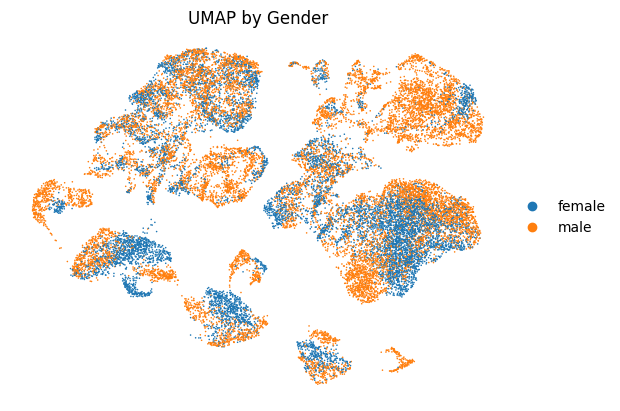

In [14]:
scanpy.tl.pca(adata_filtered, svd_solver='arpack')
scanpy.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=40)
scanpy.tl.umap(adata_filtered)
scanpy.pl.umap(adata_filtered, color='gender', title="UMAP by Gender", frameon=False)

In this gender-based analysis, the dataset was divided into male and female cohorts to examine potential sex-specific differences in cellular attributes. The cell count distribution shows a higher representation of male cells, which could introduce bias or influence the observed trends. Violin plots of RNA counts (`nCount_RNA`) reveal that males generally exhibit a slightly wider range of RNA molecule counts, suggesting possible differences in transcriptional activity or RNA stability between sexes. However, mitochondrial gene expression (`percent.mt`) appears consistent across genders, indicating that cellular energy dynamics are relatively stable between males and females. The UMAP visualization, color-coded by gender, shows a mix of male and female cells within clusters, with no distinct separation by gender. This suggests that while subtle molecular differences may exist, gender does not drive strong clustering in cellular composition, highlighting the need for more granular studies to elucidate gender-specific molecular mechanisms in neurodegenerative conditions.